# Проект "Исследование закономерностей в интернет-магазине"

Нам доступны исторические данные о продажах игр интернет-магазина «Стримчик» до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нам нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Откроем файл, сохраним его в переменной data выведем первые 10 строк на экран.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import math
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим общую информацию о данных.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


После применения метода info() видим, что датасет имеет 16715 строк и 11 столбцов (с различными типами данных: float64 и object). Названия столбцов с информацией об их содержании:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Выводы**

На данном этапе мы видим несколько проблем:

1. Пропуски в столбцах 
2. Названия столбцов не приведены к нижнему регистру
3. В некоторых столбцах нужно заменить типы данных 

### Шаг 2. Предобработка данных

Приведём названия столбцов к нижнему регистру.

In [3]:
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим подробнее, сколько в нашей таблице пропусков.

In [4]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Для начала посмотрим на пропуски в строках с именем.

In [5]:
data[pd.isna(data.name)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в строках `genre` тоже здесь присутствуют. Также видим, что здесь отсутствует информация об оценках критиков и пользователей, а также информация о рейтингах. Учитывая, что таких строк очень мало, мы можем удалить их без опаски, что это повлияет на результаты анализа.

In [6]:
data.drop([659, 14244], inplace=True)
data.isnull().sum()
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Незначительная часть пропусков есть в столбце `year_of_release`. У нас нет информации в каком году та или иная игра была представлена. В некоторых случаях в названии игры указан год, однако, это не означает, что именно в этом году игра была выпущена. Такие игры как, например, FIFA Soccer обычно выходят с указанием следующего года. Попробуем заменить пропуски здесь медианой с учётом платформы. Руководствуемся той логикой, что, например, игры на платформе PS2 выходили скорее в конце 90-х-начале нулевых, а на PS4 примерно с 2013 года.

In [7]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [8]:
platform_list = data['platform'].unique().tolist()
platform_list

['Wii',
 'NES',
 'GB',
 'DS',
 'X360',
 'PS3',
 'PS2',
 'SNES',
 'GBA',
 'PS4',
 '3DS',
 'N64',
 'PS',
 'XB',
 'PC',
 '2600',
 'PSP',
 'XOne',
 'WiiU',
 'GC',
 'GEN',
 'DC',
 'PSV',
 'SAT',
 'SCD',
 'WS',
 'NG',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

In [9]:
for platform_name in platform_list:
    data.loc[(data['platform'] == platform_name) & (data['year_of_release'].isna()), 'year_of_release'] \
                     = data.loc [(data['platform'] == platform_name), 'year_of_release']. median()

In [10]:
data['year_of_release'].isnull().sum()

0

Сделаем замену типа данных в столбце `year_of_release` с `float` на `int`, так как год выпуска - всегда целое число.

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')

Заменим значения `NaN` в столбце `rating` на `NoInfo`. Мы не можем знать, какая категория была присвоена той или иной игре, поэтому избавимся от пропусков таким образом.

In [12]:
data['rating'] = data['rating'].fillna('NoInfo')
data['rating']

0             E
1        NoInfo
2             E
3             E
4        NoInfo
          ...  
16708    NoInfo
16709    NoInfo
16710    NoInfo
16711    NoInfo
16712    NoInfo
Name: rating, Length: 16713, dtype: object

In [13]:
data['rating'].isna().sum()

0

В столбцах `critic_score` мы можем сделать замены медианой с учётом жанра.

In [14]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Посмотрим, какие жанры у нас есть и создадим список с их названиями.

In [15]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [16]:
genre_list = data['genre'].unique().tolist()
genre_list

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

Напишем цикл, с помощью которого заменим пропущенные значения в столбце `critic_score` с учётом жанра.

In [17]:
for genre_name in genre_list:
    data.loc[(data['genre'] == genre_name) & (data['critic_score'].isna()), 'critic_score'] \
                     = data.loc [(data['genre'] == genre_name), 'critic_score']. median()

In [18]:
data['critic_score'].isnull().sum()

0

Посмотрим внимательнее на столбец `user_score`. 

In [19]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
2.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Видим, что здесь преобладает аббревеатура `tbd`. Она расшифровывается как to be determined (будет определено). По сути это означает, что пока в этих строках никаких значений нет. Переведём значения `tbd` в `NaN` для того, чтобы поменять тип столбца на `float` (так как значения в столбце - числовые и не обязательно целые). А затем заменим пропуски медианой с учётом жанра, как в случае с `critic_score`.

In [20]:
data['user_score'] = data['user_score'].replace({'tbd': None})
data['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: object

In [21]:
data['user_score'].isnull().sum()

9123

In [22]:
data['user_score'] = data['user_score'].astype('float')

In [23]:
for genre_name in genre_list:
    data.loc[(data['genre'] == genre_name) & (data['user_score'].isna()), 'user_score'] \
                     = data.loc [(data['genre'] == genre_name), 'user_score']. median()

In [24]:
data['user_score'].isnull().sum()

0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [26]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NoInfo,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NoInfo,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.4,NoInfo,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NoInfo,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NoInfo,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.7,NoInfo,0.01


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
sales              16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод

Мы подготовили наши данные к исследовательскому анализу: провели замену типов данных, заполнили пропуски и отсутствующие значения, поменяли типы данных, где это было нужно.

Также мы посчитали суммарные продажи во всех регионов и записали результаты в новый столбец `sales`.

### Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и оценим важны ли данные за все периоды.

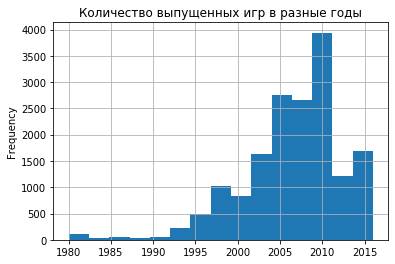

In [28]:
data['year_of_release'].plot.hist(bins=15, grid=True, title='Количество выпущенных игр в разные годы')
plt.show()

Видим, что основная масса игр выпускалась примерно с 1995 года. Построим сводную таблицу с суммарными продажами по платформам.

In [29]:
platform_pvt = data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending = False)
platform_pvt

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [30]:
top_7 = platform_pvt.query('sales > 250')
top_7

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Добавим столбец, в котором отобразим платформы, имеющие наибольшее количество продаж.

In [31]:
data['top_7'] = 'not top'
data.loc[data.platform =='PS2','top_7'] = 'PS2' 
data.loc[data.platform =='X360','top_7'] = 'X360'
data.loc[data.platform =='PS3','top_7'] = 'PS3'
data.loc[data.platform =='Wii','top_7'] = 'Wii'
data.loc[data.platform =='PS','top_7'] = 'PS'
data.loc[data.platform =='DS','top_7'] = 'DS'
data.loc[data.platform =='PS4','top_7'] = 'PS4'
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,top_7
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NoInfo,40.24,not top
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NoInfo,31.38,not top


Построим распределения продаж по годам по этим 6-ти платформам.

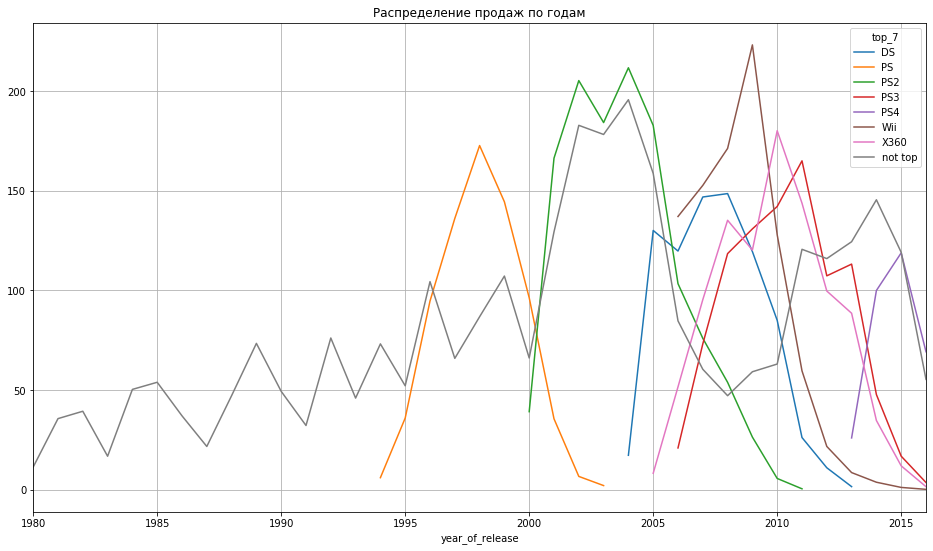

In [32]:
data.pivot_table(index='year_of_release', columns='top_7', values='sales', aggfunc='sum').plot(figsize=(16, 9), grid=True)
plt.title('Распределение продаж по годам')
plt.show()

На графике видим:

* продажи DS: с 2004 по 2013 г.;
* продажи PS: с 1994 по 2003 г.;
* продажи PS2: с 2000 по 2011 г.; 
* продажи PS3: с 2006 по 2006 г.; 
* продажи PS4: с 2013 по ? г.;
* продажи Wii: с 2006 по 2016 г.;
* продажи X360: с 2005 по 2006 г.

Как правило, каждая из платформ приносит продажи около 10 лет, а пик продаж происходит примерно через 3 года после выхода.

Поэтому, чтобы построить прогноз на 2017 год, возьмём данные с 2014 года.

In [33]:
actual_data = data.loc[data['year_of_release'].isin([2014, 2015, 2016])]
actual_data = actual_data.reset_index(drop=True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,top_7
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,7.4,NoInfo,14.63,PS4
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PS4
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.8,NoInfo,11.68,not top
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,PS4
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,7.4,NoInfo,7.98,PS4


In [34]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 13 columns):
name               1690 non-null object
platform           1690 non-null object
year_of_release    1690 non-null int64
genre              1690 non-null object
na_sales           1690 non-null float64
eu_sales           1690 non-null float64
jp_sales           1690 non-null float64
other_sales        1690 non-null float64
critic_score       1690 non-null float64
user_score         1690 non-null float64
rating             1690 non-null object
sales              1690 non-null float64
top_7              1690 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 171.8+ KB


Посмотрим, какие платформы лидируют по продажам, растут или падают.

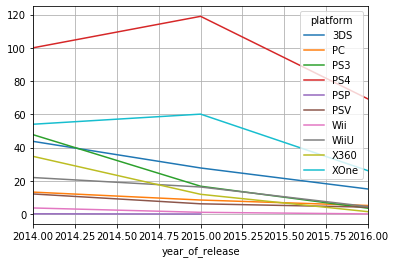

In [35]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').plot(grid=True)
plt.show()

Видим, что с отрывом лидирует PS4, также в тройке XOne и 3DS. При этом по всем платформам продажи падают.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам - лидерам продаж.

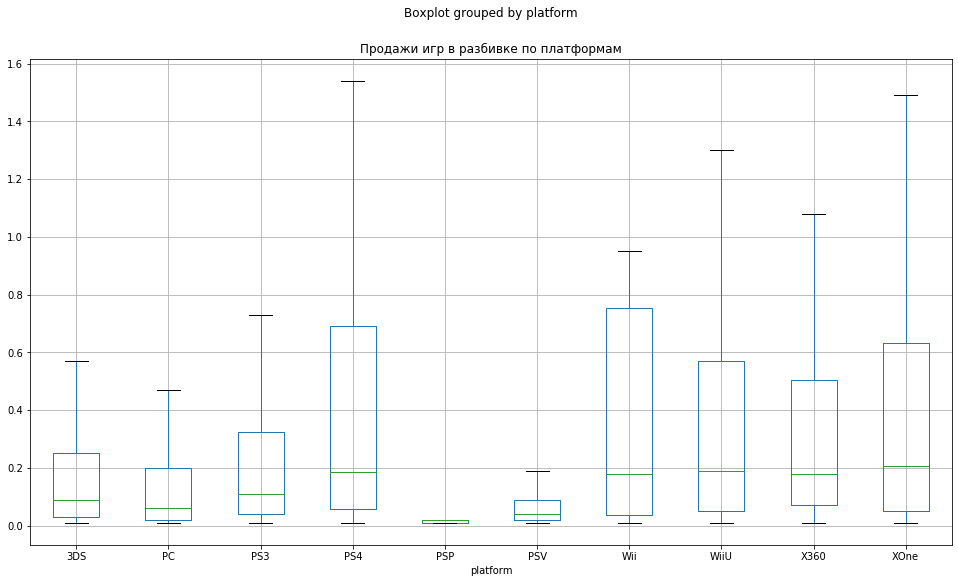

In [36]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
actual_data.boxplot(column='sales', by='platform', showfliers=False, figsize=(16, 9))
plt.title('Продажи игр в разбивке по платформам')
plt.show()

В таком графике сложно разобраться. Построим `boxplot` с помощью библиотеки `seaborn`.

(0, 2)

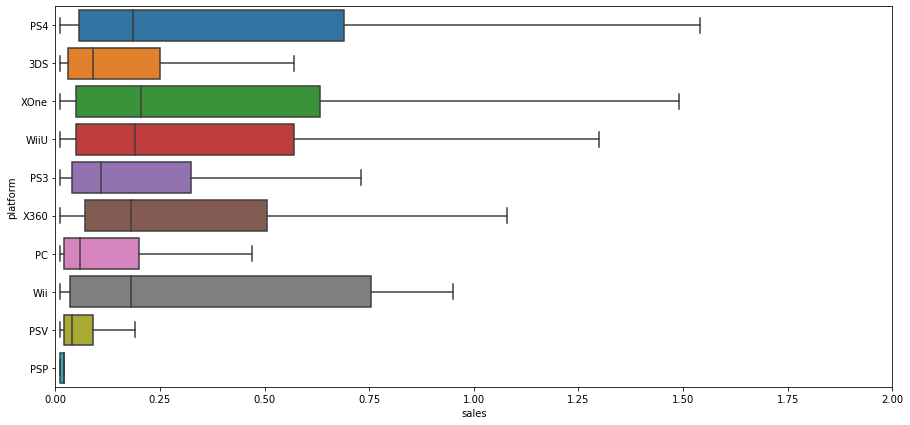

In [37]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = actual_data.query('year_of_release >= 2014'), x= 'sales', y = 'platform', showfliers=False, orient = 'h')
 
plt.xlim(0,2)

In [38]:
platform_list2 = actual_data['platform'].unique().tolist()
def get_corr_scatter_2(platform):
 
    temporary = actual_data.query('platform == @platform')
    temporary = temporary[['user_score','critic_score','sales']]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    ax1 = temporary.plot(x='critic_score', y='sales', style='o', ax=axes[0])
    ax2 = temporary.plot(kind='scatter', x='user_score', y='sales', ax=axes[1])
    fig.suptitle(platform)
    
    plt.show()
    
    print('Корреляция critic_score - sales равна {}'.format(
        round(temporary[['critic_score', 'sales']].corr()['sales'][0], 3)))
    
    print('Корреляция user_score - sales равна {}'.format(
        round(temporary[['user_score', 'sales']].corr()['sales'][0], 3)))

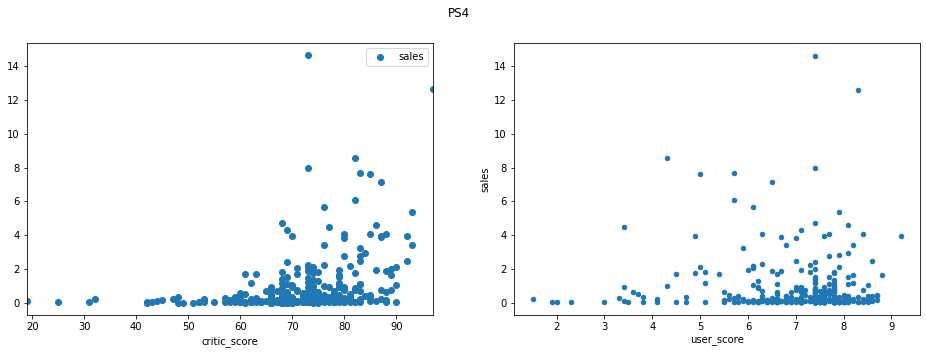

Корреляция critic_score - sales равна 0.346
Корреляция user_score - sales равна -0.067


In [39]:
get_corr_scatter_2(platform_list2[0])

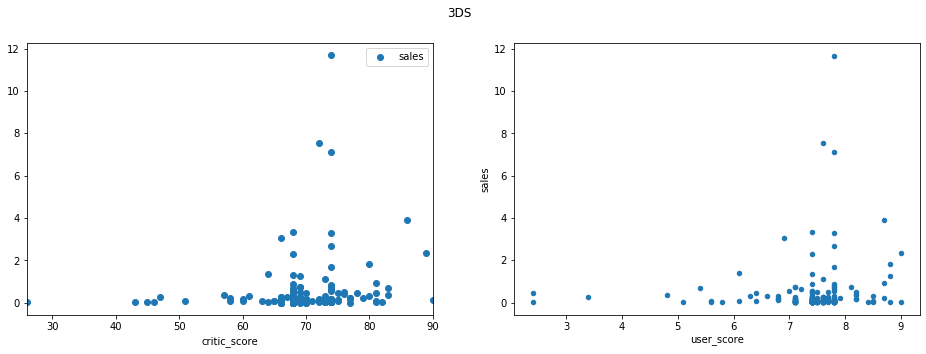

Корреляция critic_score - sales равна 0.17
Корреляция user_score - sales равна 0.097


In [40]:
get_corr_scatter_2(platform_list2[1])

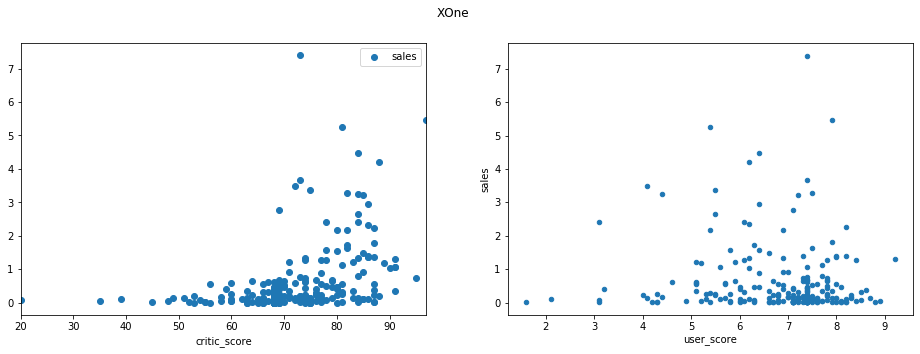

Корреляция critic_score - sales равна 0.394
Корреляция user_score - sales равна -0.099


In [41]:
get_corr_scatter_2(platform_list2[2])

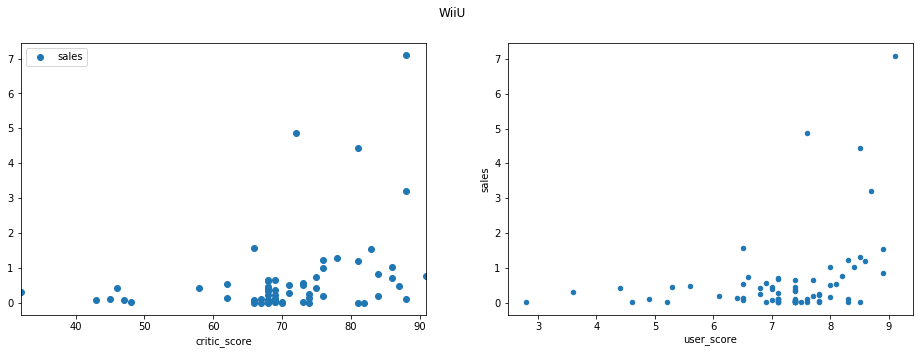

Корреляция critic_score - sales равна 0.349
Корреляция user_score - sales равна 0.338


In [42]:
get_corr_scatter_2(platform_list2[3])

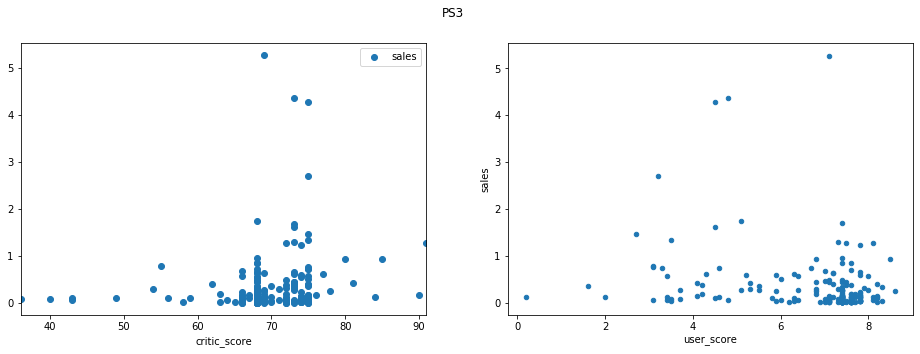

Корреляция critic_score - sales равна 0.168
Корреляция user_score - sales равна -0.249


In [43]:
get_corr_scatter_2(platform_list2[4])

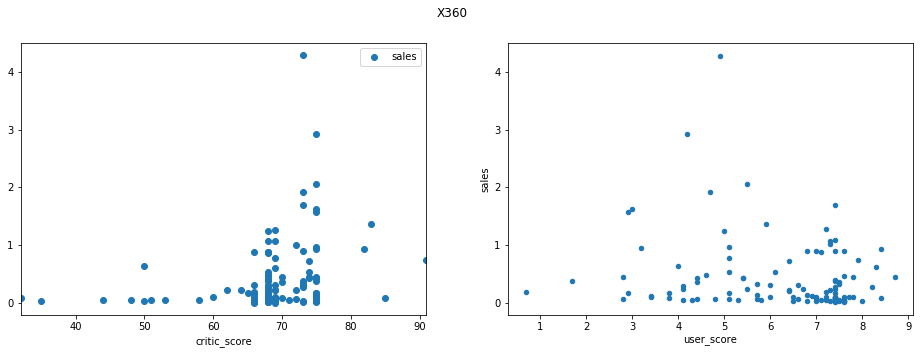

Корреляция critic_score - sales равна 0.255
Корреляция user_score - sales равна -0.186


In [44]:
get_corr_scatter_2(platform_list2[5])

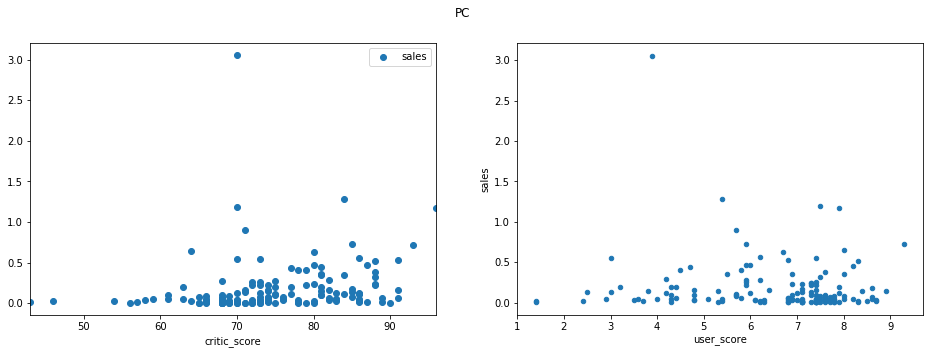

Корреляция critic_score - sales равна 0.206
Корреляция user_score - sales равна -0.098


In [45]:
get_corr_scatter_2(platform_list2[6])

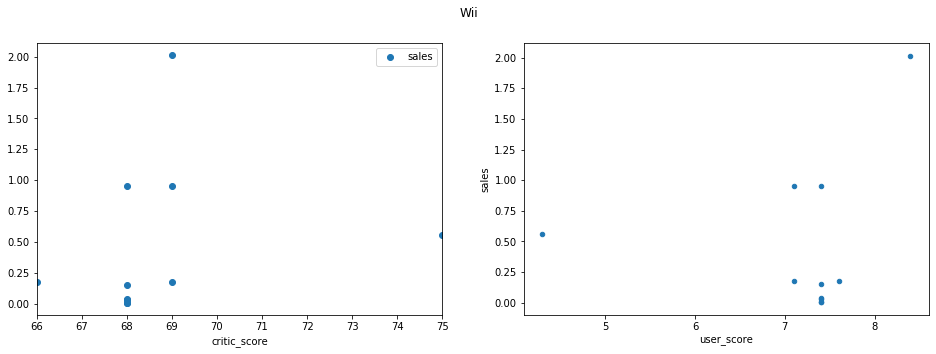

Корреляция critic_score - sales равна 0.215
Корреляция user_score - sales равна 0.177


In [46]:
get_corr_scatter_2(platform_list2[7])

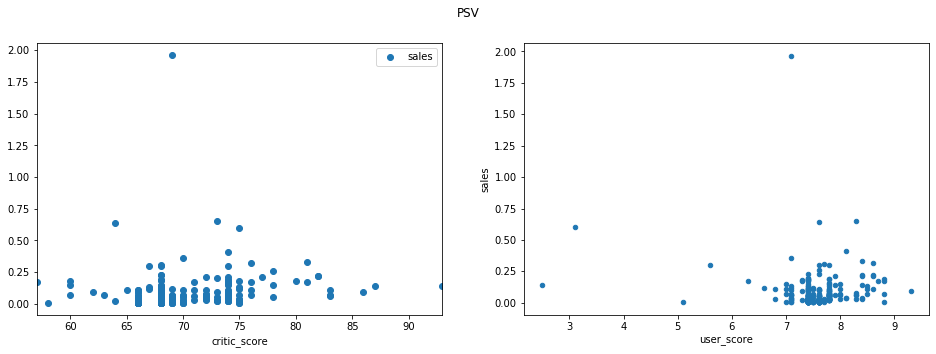

Корреляция critic_score - sales равна 0.165
Корреляция user_score - sales равна -0.074


In [47]:
get_corr_scatter_2(platform_list2[8])

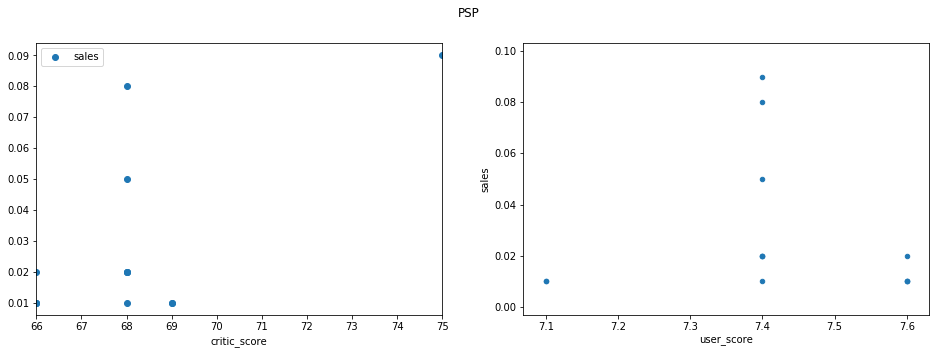

Корреляция critic_score - sales равна 0.665
Корреляция user_score - sales равна -0.028


In [48]:
get_corr_scatter_2(platform_list2[9])

Построим диаграмму рассеяния по всем платформам и посчитаем корреляцию между отзывами и продажами.

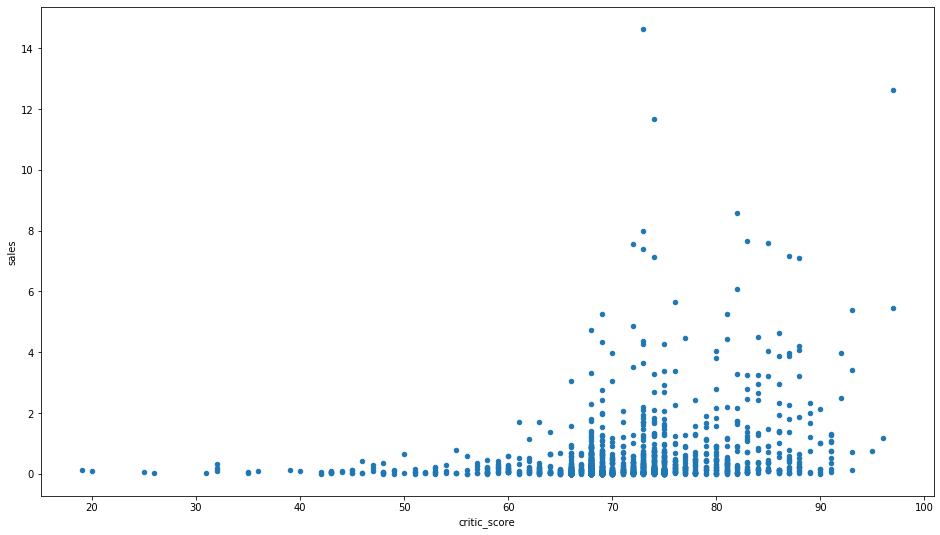

In [49]:
actual_data.plot(x='critic_score',y='sales',kind='scatter',figsize=(16,9))
plt.show()

Видим, что присутствует зависимость: чем выше отзывы критиков, тем выше продажи. Теперь посмотрим как влияют на продажи отзывы пользователей. 

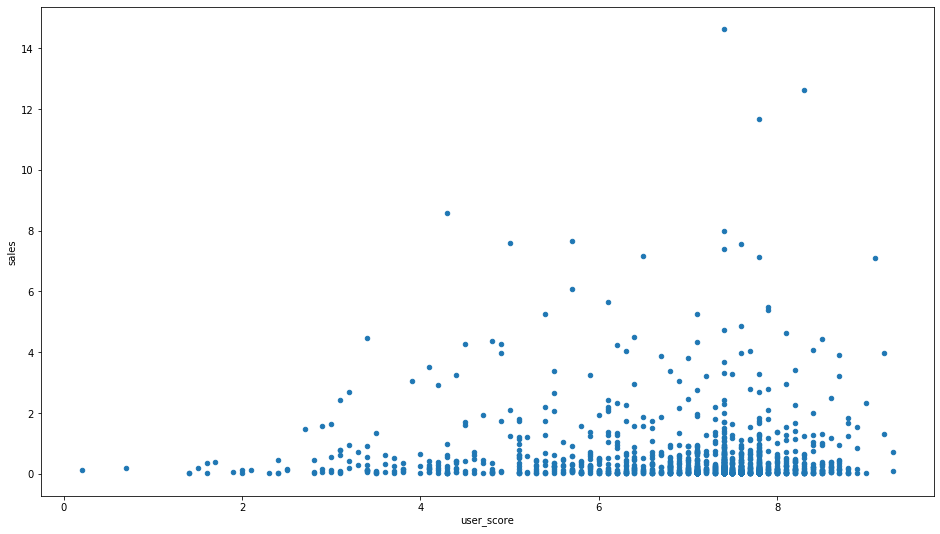

In [50]:
actual_data.plot(x='user_score',y='sales',kind='scatter',figsize=(16,9))
plt.show()

Здесь наблюдаем подобную зависимость, но в чуть меньшей степени.

Применим метод `corr()` и посмотрим на значения корреляции.

In [51]:
actual_data['sales'].corr(data['critic_score'])

0.12944818984380277

In [52]:
actual_data['sales'].corr(data['user_score'])

0.029223567074942305

Отдельные графики по платформам подтверждают наше предположение, что существует положительная зависимость продаж от отзывов критиков. Тем временем, изучив корреляцию продаж и оценок пользователей, мы видим, что в 7 случаях из 10 присутсвует отрицательная корреляция (хоть и очень маленькая). В общем и целом можем заключить, что небольшое влияние оценок критиков на продажи есть, в то время как влияние оценок пользователей на продажи практически отсутствует (только по платформе `Wiiu` мы её увидели).

Посмотрим на общее распределение игр по жанрам.

In [53]:
actual_data['genre'].value_counts()

Action          619
Role-Playing    222
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Игры в жанре `action` на твёрдом первом месте по количеству копий. Посмотрим, какой из жанров самы прибыльный.

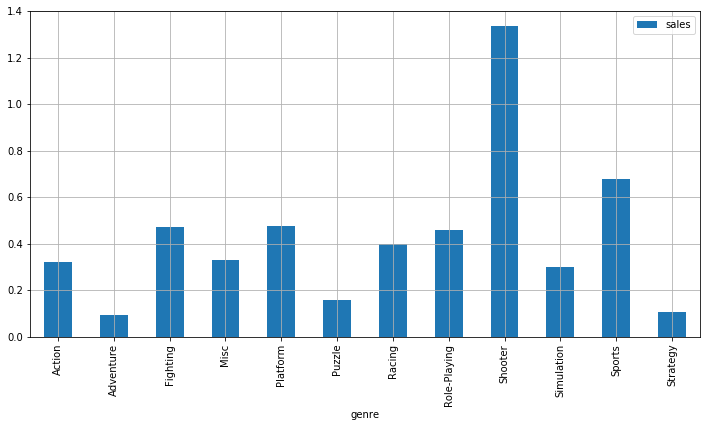

In [54]:
actual_data.pivot_table(index='genre', values='sales', aggfunc='mean').plot(kind='bar', figsize=(12,6), grid=True)
plt.show()

Видим, что игры в жанере `Shooter` уверенно лидируют по количеству продаж. При этом по количесву копий такие игры находятся только на 5-м месте. Продажи игр в жанрах `Adventure`, `Puzzle` и `Strategy` заметно "проседают". 

### Вывод

На этом шаге мы провели исследовательский анализ данных с 2014 года и выявили следующие моменты:

* лидером продаж среди платформ является `PS4`;
* существует небольшая зависимость между оценками критиков/пользователей и продажами. При чём критики влияют на этот показатель чуть больше;
* самое большее количество игр появилось в жанре `Action`;
* самым прибыльным жанром является `Shooter`, хотя по количеству игр он занимает лишь 5-е место.

### Шаг 4. Составление портрета пользователя каждого региона

Определим для пользователей каждого региона самые популярные платформы. 

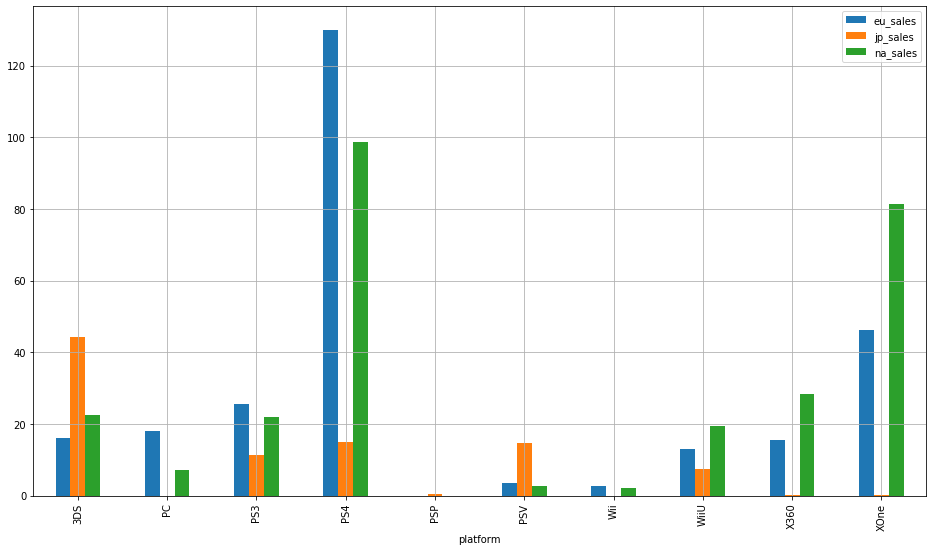

In [55]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']
actual_data.pivot_table(index='platform', values=region_list, aggfunc='sum').plot(kind='bar', figsize=(16, 9), grid=True)
plt.show()

В Европе абсолютным лидером продаж является `PS4`. Также в топ-5 входят: `XOne`, `PS3`, `PC`, и `3DS`.

В Северной Америке также лидирует `PS4` и тоже на втором месте `XOne`. А вот на третье вырывается `X360`. Замыкают пятёрку `3DS` и `PS3`.

В Японии лидер продаж - `3DS`. Второе и третье места делят `PS4` и `PSV`, также в пятёрке `WiiU` и `PS3`.

В целом по количеству продаж Европа и Северная Америка близки друг к другу. Ощутимо в отстаёт Япония, однако, сложно сравнивать континенты и отдельные страны. Тем не менее Япония - абсолютный лидер по продажам сразу двух платформ: `3DS` и `PSV`. 

Теперь посомтрим на самые популярные жанры в Европе, Северной Америке и Японии.

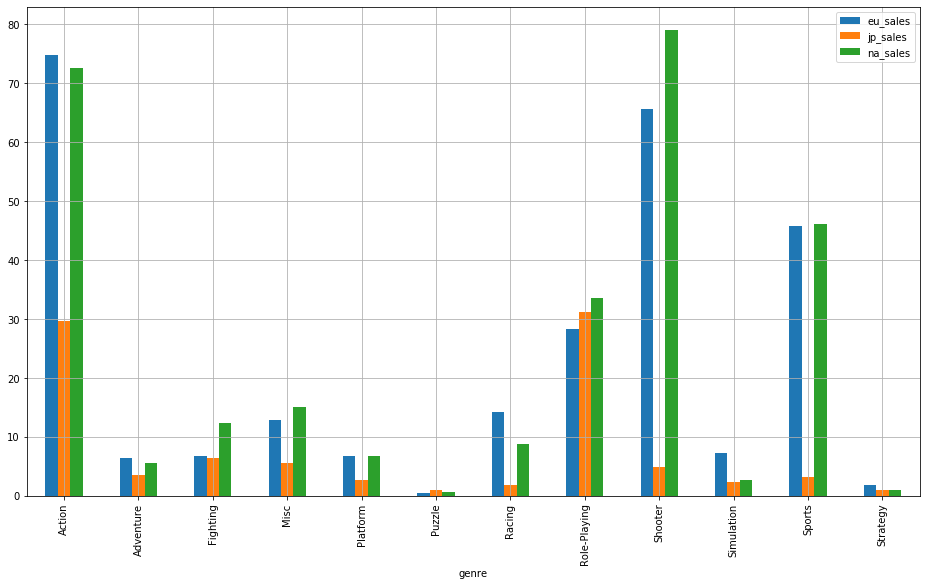

In [56]:
actual_data.pivot_table(index='genre', values=region_list, aggfunc='sum').plot(kind='bar', figsize=(16, 9), grid=True)
plt.show()

Европейцы больше всего нравятся игры в жанрах `Action`, `Shooter` и  `Sports`. Также в пятёрке `Role-Playing` и `Racing`.

В Северной Америке пятёрка почти такая же, но на пятом месте расположился жанр `Misc`, а `Action` уступает первую строчку жанру `Shooter`. 

В Японии иначе: `Role-Playing` на первом месте, далее идёт `Action`. `Fighting`, `Shooter`, `Misc` тоже входят в пятёрку самых популярных жанров.

Видим, что представители Европы больше остальных отдают предпочтение жанру `Racing`, но меньше играют в игры жанра `Role-Playing`. Также как и в Северной Америке, в европе с удовольствием играют в спортивные игры, а в Японии этому жанру скорее предпочтут `Fighting`.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе. 

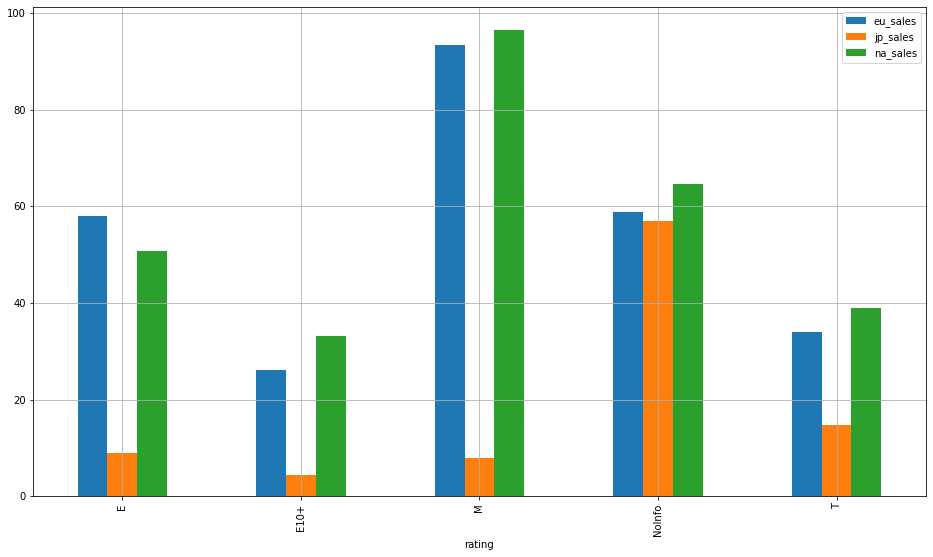

In [57]:
actual_data.pivot_table(index='rating', values=region_list, aggfunc='sum').plot(kind='bar', figsize=(16, 9), grid=True)
plt.show()

Видим, что в Японии особенных различий в продажах из-за рейтнга `ESRB` нет. Можно отметить, что чуть в большем количестве продаются игры с рейтингом `T` (что означает "игры для подростков").

В Европе и Северной Америке заметно лучше продаются игры с рейтингом `M` ("для взрослых") и, наоборот, меньше продаж игр с рейтингом `E10+` ("для всех от 10 лет и старше").

### Вывод

По результатам анализа можно сделать следующие выводы:

* портреты пользователя в Европе и Северной Америке похожи. Это скорее всего люди, играющие на платформах `PS4`, либо `XOne`, в игры жанров `Action`, `Shooter` и  `Sports`. При этом, исходя из распределения по рейтингам, это не только дети и подростки, но и взрослые;
* типичный пользователь в Японии - скорее подросток, играющий на платформах `3DS` или `PSV` в игры жанра `Role-Playing` и `Action`.

### Шаг 5. Проверка гипотез

Проверим следующие гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сначала проверим 1-ю гипотезу. Построим гистограммы с пользовательскими рейтингами для обеих платформ.

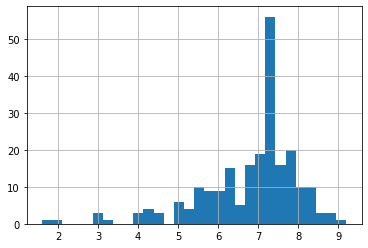

In [58]:
actual_data.query('platform == "XOne"')['user_score'].hist(bins=30)
plt.show()

По `XOne` распределение похоже на нормальное со смещением вправо.

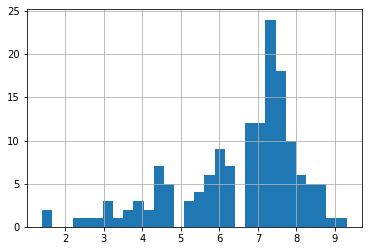

In [59]:
actual_data.query('platform == "PC"')['user_score'].hist(bins=30)
plt.show()

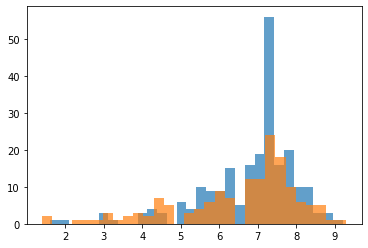

In [60]:
a = actual_data.query('platform == "XOne"')['user_score']
b = actual_data.query('platform == "PC"')['user_score']
plt.hist(a, alpha=0.7, bins=30)
plt.hist(b, alpha=0.7, bins=30)
plt.show()

Похожая ситуация и с `PC`: распределение нормальное, смещено вправо.

Так как выборки независимые, будем проверять гипотезу с помощью функции `ttest_ind`, вычисляющую t-тест двух независимых выборок. 

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Посчитаем дисперсию. Мы указываем параметр `ddof=1`, т.к. работаем не с генеральной совокупностью, а с выборкой.

In [61]:
mean_uscore_xone = actual_data.query('platform == "XOne"')['user_score']
mean_uscore_pc = actual_data.query('platform == "PC"')['user_score']

In [62]:
mean_uscore_xone_var = np.var(mean_uscore_xone, ddof=1)
mean_uscore_xone_var

1.5145042120720305

In [63]:
mean_uscore_pc_var = np.var(mean_uscore_pc, ddof=1)
mean_uscore_pc_var

2.5628944812362033

In [64]:
alpha = .05

results = st.ttest_ind(
    mean_uscore_xone, 
    mean_uscore_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03929868432092195
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу. Это значит, что средние пользовательские рейтинги платформ `XOne` и `PC` различаются.

Проверим 2-ю гипотезу. Построим гистограммы с пользовательскими рейтингами для жанров `Action` и `Sports`.

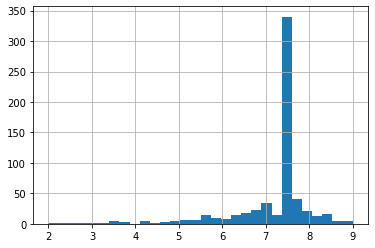

In [65]:
actual_data.query('genre == "Action"')['user_score'].hist(bins=30)
plt.show()

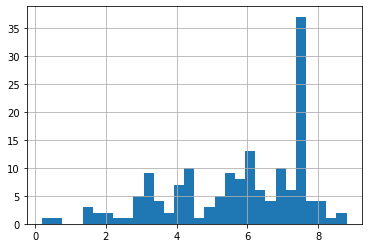

In [66]:
actual_data.query('genre == "Sports"')['user_score'].hist(bins=30)
plt.show()

В случае с `Action` мы можем говорить о нормальном распределении, смещённым вправо, а в случае со `Sports` уже нет. Но мы всё равно будем проводить `st.ttest_ind` в рамках обучения.

Нулевая гипотеза: средние пользовательские рейтинги жанров `Action`  и `Sports` одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги жанров `Action`  и `Sports` различаются.

In [67]:
mean_uscore_action = actual_data.query('genre == "Action"')['user_score']
mean_uscore_sports = actual_data.query('genre == "Sports"')['user_score']

In [68]:
mean_uscore_action_var = np.var(mean_uscore_action, ddof=1)
mean_uscore_action_var

1.0115072854745364

In [69]:
mean_uscore_sports_var = np.var(mean_uscore_sports, ddof=1)
mean_uscore_sports_var

3.5073198757763975

In [70]:
alpha = .05

results = st.ttest_ind(
    mean_uscore_action, 
    mean_uscore_sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.412639945317349e-17
Отвергаем нулевую гипотезу


Здесь мы также отвергаем нулвую гипотезу и делаем вывод, что средние пользовательские рейтинги жанров `Action`  и `Sports` различаются.

### Вывод

На этом этапе мы проверили 2 гипотезы о (не)равенстве средних пользовательских жанров и выяснили, что:

* средние пользовательские рейтинги платформ `XOne` и `PC` различаются;
* средние пользовательские рейтинги жанров `Action`  и `Sports` различаются.

### Шаг 6. Общий вывод

Мы подготовили и проанализировали наши данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Основываясь на выявленных закономерностях, мы можем сделать следующие выводы:

* продавая игры в Европе и Северной Америке, нам нужно ориентироваться не только на детей, но и на взрослых; в частности на игры с рейтингом "М";
* в этих регионах нужно сделать основной упор на три жанра: `Action`, `Shooter` и `Sports`; 
* в Японии помимо жанров `Action` и `Shooter` нужно продвигать `Roling-playing` и `Fighting`;
* нужно учесть, что в Японии пользуются популярностью игры с рейтингом "Т" (для подростков);
* игры для `PS4` и `XOne` пользуются большой популярностью в Европе и Северной Америке, поэтому нужно делать акцент на продажах игр для этих платформ;
* в Японии предпочитают играть на платформах `3DS` и `PSV`, поэтому логично будет предложить в этом регионе игры для них.